In [1]:
!pip install yfinance numpy pandas matplotlib scikit-learn tensorflow --quiet

In [6]:
## import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
## Step 3: Define Utility Functions
def preprocess_data(data, sequence_length=60):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data[['Close']])
    
    X, y = [], []
    for i in range(sequence_length, len(scaled)):
        X.append(scaled[i-sequence_length:i])
        y.append(scaled[i])
        
    X = np.array(X)
    y = np.array(y)
    return X, y, scaler

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=False, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

[*********************100%***********************]  1 of 1 completed

Processing NVDA...



C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\1593802743.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # ✅ ensure float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


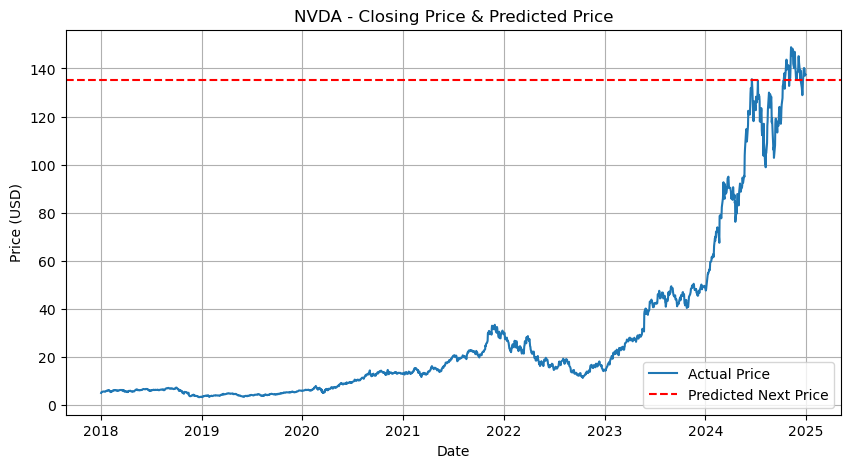

Processing AAPL...


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\1593802743.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # ✅ ensure float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


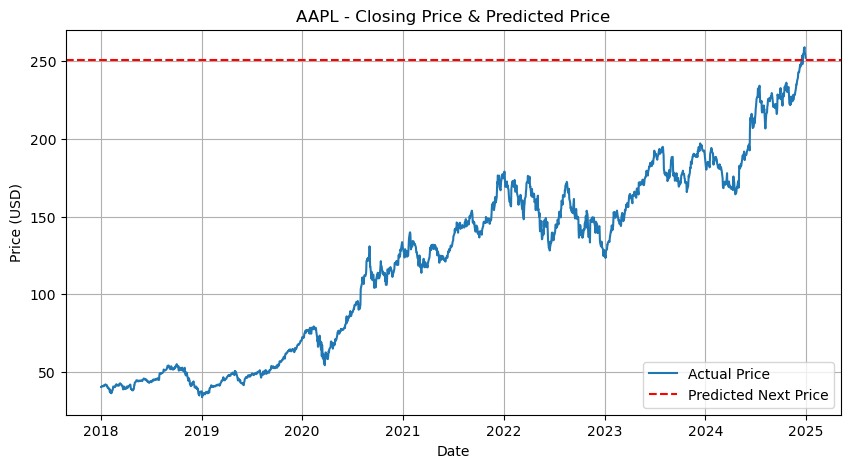

Processing ^GSPC...


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\1593802743.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # ✅ ensure float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


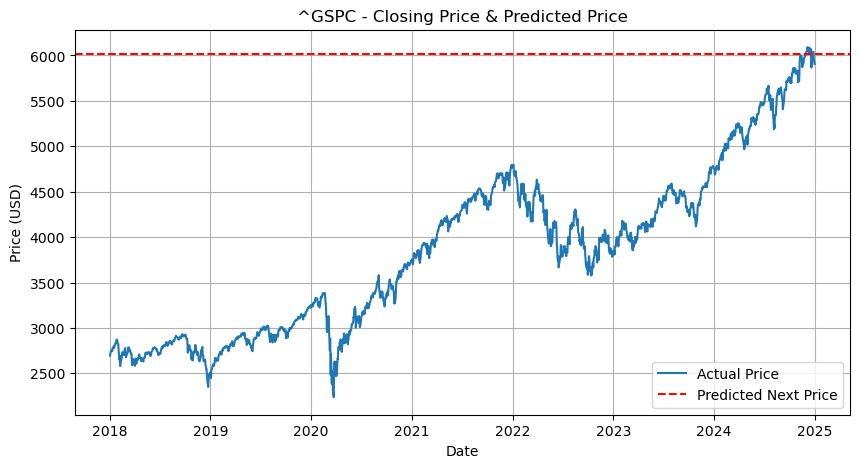

Processing GOOGL...


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\1593802743.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # ✅ ensure float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


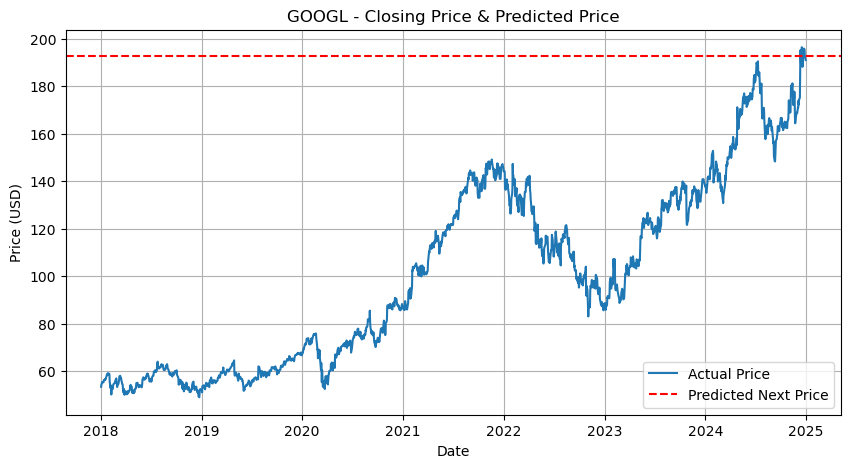

Processing BRK-B...


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\1593802743.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # ✅ ensure float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


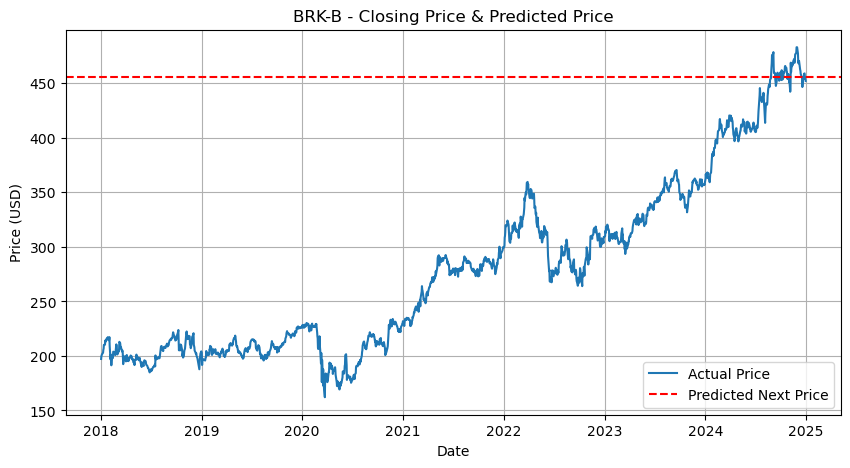

Processing MSFT...


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\1593802743.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # ✅ ensure float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


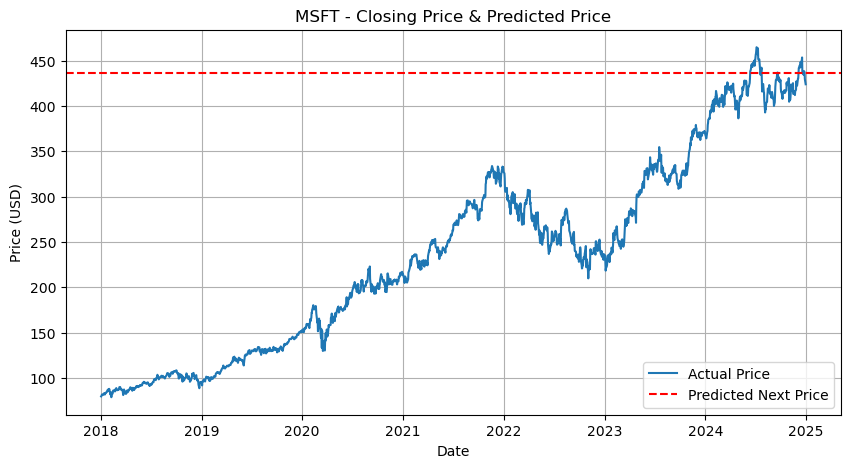

In [8]:
tickers = ['NVDA', 'AAPL', '^GSPC', 'GOOGL', 'BRK-B', 'MSFT']
results = []

for ticker in tickers:
    print(f"Processing {ticker}...")
    data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
    current_price = float(data['Close'].iloc[-1])  # ✅ ensure float

    # Preprocess
    X, y, scaler = preprocess_data(data)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Build and train model
    model = build_lstm_model((X.shape[1], 1))
    model.fit(X, y, batch_size=32, epochs=5, verbose=0)
    
    # Predict next day's price
    last_sequence = data[['Close']].values[-60:]
    scaled_last = scaler.transform(last_sequence)
    scaled_last = scaled_last.reshape(1, 60, 1)
    
    predicted_scaled = model.predict(scaled_last)
    predicted_price = float(scaler.inverse_transform(predicted_scaled)[0][0])  # ✅ force float

    # Calculate profit and growth
    profit = predicted_price - current_price
    growth = float((profit / current_price) * 100)  # ✅ force float again

    # Decision logic
    if growth > 5:
        decision = "✅ Buy"
    elif growth > 0:
        decision = "⚠️ Watch"
    else:
        decision = "❌ Hold"

    # Store results
    results.append([
        ticker,
        round(current_price, 2),
        round(predicted_price, 2),
        round(growth, 2),
        decision
    ])
    
    # Visualize
    plt.figure(figsize=(10, 5))
    plt.plot(data['Close'], label='Actual Price')
    plt.axhline(y=predicted_price, color='r', linestyle='--', label='Predicted Next Price')
    plt.title(f"{ticker} - Closing Price & Predicted Price")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

In [9]:
df_results = pd.DataFrame(results, columns=['Ticker', 'Current Price', 'Predicted Price', 'Growth (%)', 'Recommendation'])
df_results

,Ticker,Current Price,Predicted Price,Growth (%),Recommendation
0,NVDA,137.48,135.10,-1.73,❌ Hold
1,AAPL,251.92,250.84,-0.43,❌ Hold
2,^GSPC,5906.94,6018.68,1.89,⚠️ Watch
3,GOOGL,191.02,192.89,0.98,⚠️ Watch
4,BRK-B,452.16,455.86,0.82,⚠️ Watch
5,MSFT,423.98,436.38,2.92,⚠️ Watch


[*********************100%***********************]  1 of 1 completed

Processing NVDA...



C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\3375919723.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # Make sure it's a float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


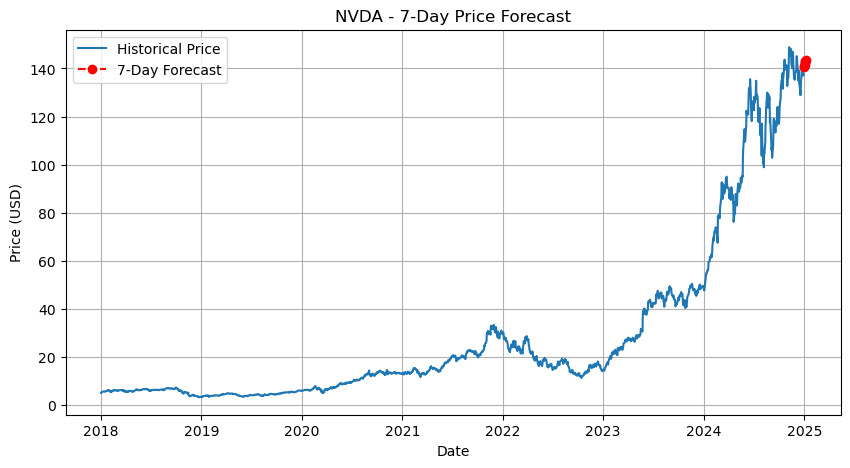

Processing AAPL...


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\3375919723.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # Make sure it's a float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


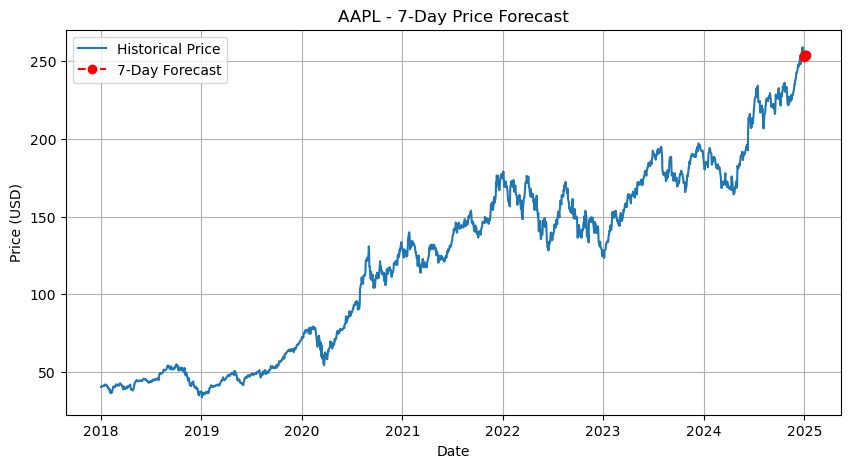

[*********************100%***********************]  1 of 1 completed

Processing ^GSPC...



C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\3375919723.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # Make sure it's a float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


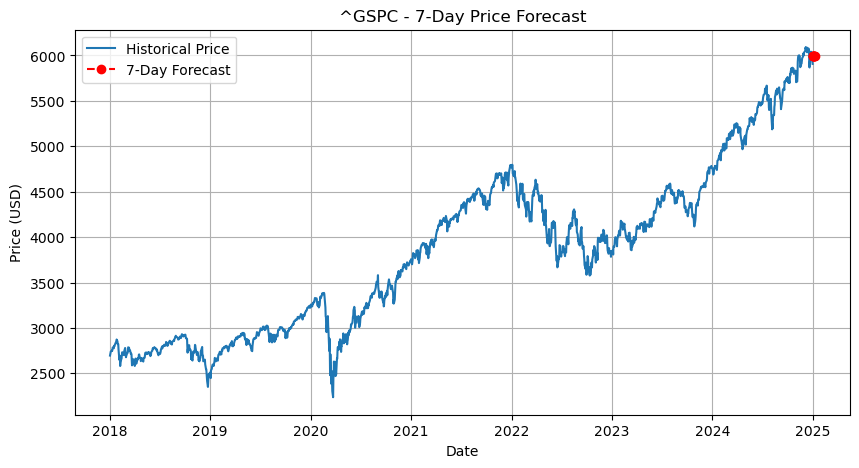

[*********************100%***********************]  1 of 1 completed

Processing GOOGL...



C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\3375919723.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # Make sure it's a float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


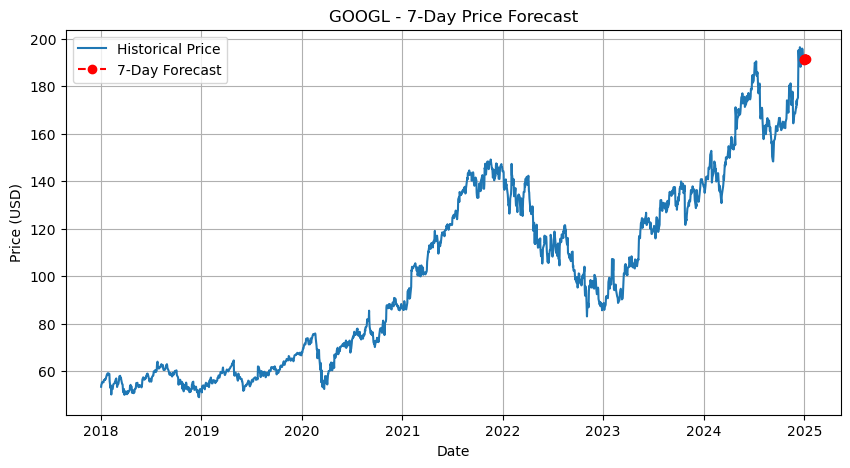

[*********************100%***********************]  1 of 1 completed

Processing BRK-B...



C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\3375919723.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # Make sure it's a float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


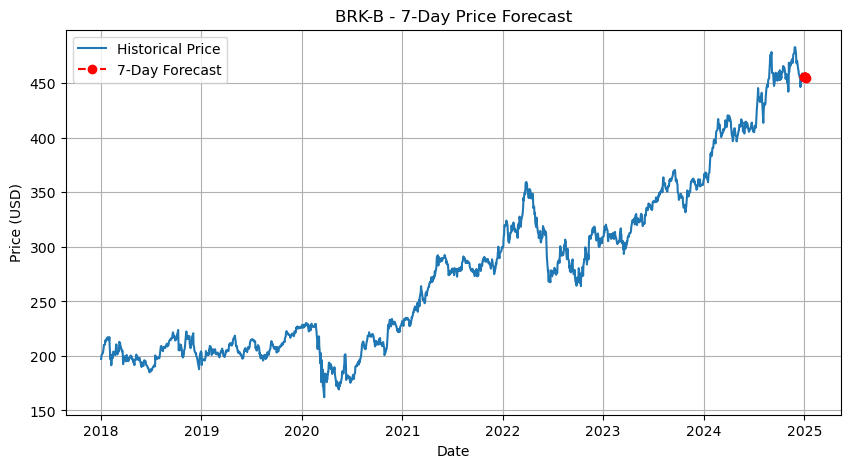

Processing MSFT...


[*********************100%***********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_21032\3375919723.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])  # Make sure it's a float
C:\Users\Acer\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


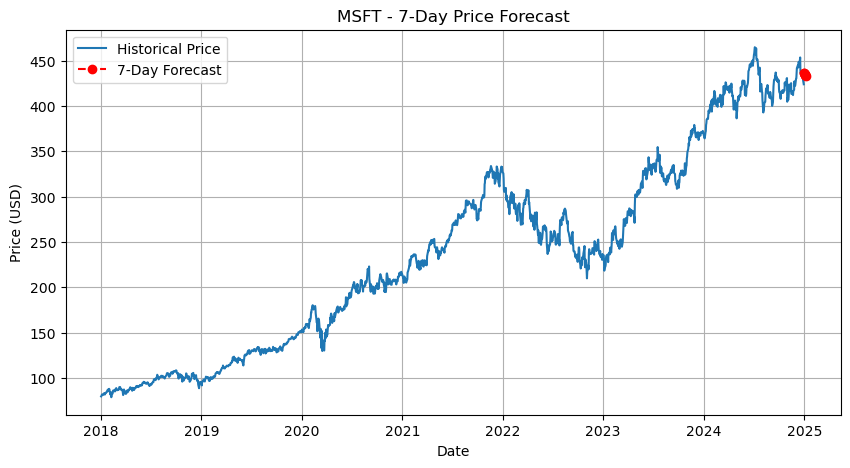

In [10]:
tickers = ['NVDA', 'AAPL', '^GSPC', 'GOOGL', 'BRK-B', 'MSFT']
results = []

for ticker in tickers:
    print(f"Processing {ticker}...")
    data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
    current_price = float(data['Close'].iloc[-1])  # Make sure it's a float

    # Preprocess
    X, y, scaler = preprocess_data(data)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Train model
    model = build_lstm_model((X.shape[1], 1))
    model.fit(X, y, batch_size=32, epochs=5, verbose=0)

    # 🔄 Predict next 7 days recursively
    future_days = 7
    future_predictions = []
    last_sequence = data[['Close']].values[-60:]
    scaled_last = scaler.transform(last_sequence)

    for _ in range(future_days):
        X_input = scaled_last.reshape(1, 60, 1)
        pred_scaled = model.predict(X_input)
        future_predictions.append(pred_scaled[0][0])
        # Update sequence (remove first value, add new one)
        scaled_last = np.append(scaled_last, pred_scaled)[1:]

    # 🔁 Convert predictions back to actual prices
    future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    predicted_price = float(future_prices[-1])  # Use the last day's forecast for evaluation

    # 🔎 Evaluate prediction
    profit = predicted_price - current_price
    growth = (profit / current_price) * 100

    if growth > 5:
        decision = "✅ Buy"
    elif growth > 0:
        decision = "⚠️ Watch"
    else:
        decision = "❌ Hold"

    # 📝 Save result
    results.append([
        ticker,
        round(current_price, 2),
        round(predicted_price, 2),
        round(growth, 2),
        decision
    ])

    # 📊 Plot actual + forecast
    import datetime
    future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_days)
    plt.figure(figsize=(10, 5))
    plt.plot(data['Close'], label='Historical Price')
    plt.plot(future_dates, future_prices, marker='o', linestyle='--', color='r', label='7-Day Forecast')
    plt.title(f"{ticker} - 7-Day Price Forecast")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
df_results = pd.DataFrame(results, columns=['Ticker', 'Current Price', 'Predicted Price (Day 7)', 'Growth (%)', 'Recommendation'])
df_results

,Ticker,Current Price,Predicted Price (Day 7),Growth (%),Recommendation
0,NVDA,137.48,143.72,4.54,⚠️ Watch
1,AAPL,251.92,253.69,0.70,⚠️ Watch
2,^GSPC,5906.94,5991.84,1.44,⚠️ Watch
3,GOOGL,191.02,191.60,0.30,⚠️ Watch
4,BRK-B,452.16,455.24,0.68,⚠️ Watch
5,MSFT,423.98,433.45,2.23,⚠️ Watch
